# OpenDC Demo 1
### First experiment

Datacenters are becoming an increasingly large contributor to the global carbon footprint. However, because of a lack of tools/guidelines, it has been challenging to optimize datacenters for carbon emissions. This is amplified by the fact that running experiments on datacenters is both expensive and time-consuming. 

OpenDC is an event-based discrete datacenter simulator. Using such a tool, we can do experiments on datacenters in a cost-effective and flexible way. In this demo, we will learn how to conduct a simple experiment. After, we learn how to aggregate and visualize the results for more insights.  

You can read more about OpenDC [here](https://opendc.org/) and [here](https://atlarge-research.github.io/opendc/docs/category/getting-started/).

# Topology

To run a simulation, OpenDC needs a definition of the datacenter, which we call the topology. The topology of a datacenter can influence its performance and sustainability greatly. It determines which tasks can be run, how efficiently they are run, and if they can be executed in parallel.

The topology of a data center is provided using a JSON file. This file defines the number of clusters available, the hosts they contain, and the type of hosts they comprise. The topology file used for the Surf workload is shown below and can be found [here](topologies/1.first_experiment/surfsara.json):

```json
{
    "clusters":
    [
        {
            "name": "C01",
            "hosts" :
            [
                {
                    "name": "H01",
                    "cpu":
                    {
                        "coreCount": 16,
                        "coreSpeed": 2100
                    },
                    "memory": {
                        "memorySize": 100000
                    },
                    "cpuPowerModel": {
                        "modelType": "linear",
                        "power": 400.0,
                        "idlePower": 32.0,
                        "maxPower": 180.0
                    },
                    "count": 279
                }
            ],
            "powerSource": {
                "carbonTracePath": "carbon_traces/NL_2021-2024.parquet"
            }
        }
    ]
}
```

The small datacenter contains only a single cluster *C01*, which contains 279 host of type *H01*. Host *H01* constains a single CPU with 16 cores running at 2100 Mhz, and has a memory of 100000 Bytes.

# Workloads

To run a simulation, OpenDC requires information on the type of workload to execute.

The workload is provided using two files:
<ul>
    <li> **tasks.parquet** provides a general overview of the tasks executed during the workload. </li>
    <li> **fragments.parquet** provides detailed information about each task during its runtime. </li>
</ul>

In this demo, we are running the [surf_week](workload_traces/surf_week/) dataset as our workload. 
The surf_week workload is a week-long workload collected from the surf LISA cluster.
The workload consists of 6295 tasks with an average runtime of three hours. 

##### Let's have a look at the files

In [1]:
import pandas as pd

df_tasks = pd.read_parquet("workload_traces/surf_week/tasks.parquet")
df_fragments = pd.read_parquet("workload_traces/surf_week/fragments.parquet")

In [2]:
df_tasks.head()

,id,submission_time,duration,cpu_count,cpu_capacity,mem_capacity
0,2133099,1665093600000,27930000,16,33600.0,100000
1,2133100,1665093600000,27930000,16,33600.0,100000
2,2133101,1665093600000,27930000,16,33600.0,100000
3,2133102,1665093600000,27930000,16,33600.0,100000
4,2133111,1665093600000,27930000,16,33600.0,100000


### Fragments

<img src="./figures/fragments.jpg" width=600, alt="Alternative text" />

##### One week of surfsara tasks has over 2 million fragments

In [3]:
df_fragments.head()

,id,duration,cpu_usage
0,2147116,30000,42.0
1,2147116,30000,21.0
2,2147116,30000,21.0
3,2147116,30000,0.0
4,2147116,30000,0.0


# Carbon Trace

- Carbon Traces define the Carbon Intenisty of the available energy over time

- Collected using [ElectricityMaps](https://portal.electricitymaps.com) and [ENTSO-E](https://www.entsoe.eu/)

- Specific to the location of the datacenter

- Defined as a JSON file

In [4]:
df_carbon = pd.read_parquet("carbon_traces/NL_2021-2024.parquet")

df_carbon.head()

,timestamp,carbon_intensity
0,2021-01-01 00:00:00,464.62
1,2021-01-01 01:00:00,459.98
2,2021-01-01 02:00:00,454.93
3,2021-01-01 03:00:00,448.39
4,2021-01-01 04:00:00,455.50


# Experiment

Finally, OpenDC needs an experiment file. The Experiment file describes what needs to be run, how, and when. An experiment is defined using a JSON file. The experiment we will use for this demo can be found [here](experiments/1.first_experiment/simple_experiment.json) and is shown below:

```json
{
    "name": "1.first_experiment",
    "topologies": [
        {
            "pathToFile": "topologies/1.first_experiment/surfsara.json"
        }
    ],
    "workloads": [
        {
            "pathToFile": "workload_traces/surf_week",
            "type": "ComputeWorkload"
        }
    ],
    "exportModels": [
        {
            "exportInterval": 3600,
            "printFrequency": 1680,
            "filesToExport": [
                "host",
                "powerSource",
                "service",
                "task"
            ]
        }
    ]
}
```

The scenario file used in this demo defines four variables:
- "name" defines where the output files will be stored
- "topologies" defines the different topologies that will be used in the experiments
- "workloads" defines what workloads will be run
- "exportModels" defines how frequently OpenDC should export data


Note: most of the variables in the scenario file are provided as lists. This enables the execution of different experiments within the same scenario. Graph Greenifier will run all combinations of variables as separate experiments. In this demo, we provide two topologies and a single workload. This means that the same workload will be executed in both scenarios, resulting in two results.

# Running an Experiment

An experiment can be run directly from the terminal using the OpenDCExperimentRunner.

In [67]:
import subprocess

pathToScenario = "experiments/1.first_experiment/simple_experiment.json"
subprocess.run(["OpenDCExperimentRunner/bin/OpenDCExperimentRunner", "--experiment-path", pathToScenario])



 Running scenario: 0 
 Starting seed: 0 


Simulating...   0% [                                       ] 0/1 (0:00:00 / ?) 

20:19:55.636 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 24 hours:
						Tasks Total: 551
						Tasks Active: 124
						Tasks Pending: 0
						Tasks Completed: 427
						Tasks Terminated: 0

20:19:56.171 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 48 hours:
						Tasks Total: 1024
						Tasks Active: 78
						Tasks Pending: 0
						Tasks Completed: 946
						Tasks Terminated: 0

20:19:56.560 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 72 hours:
						Tasks Total: 1421
						Tasks Active: 81
						Tasks Pending: 0
						Tasks Completed: 1340
						Tasks Terminated: 0

20:19:56.976 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 96 hours:
						Tasks Total: 2037
						Tasks Active: 130
						Tasks Pending: 0
						Tasks Completed: 1907
						Tasks Terminated: 0

20:19:57.411 [WARN ] org.opendc.compute.simulator.tel

Simulating... 100% [=================================] 1/1 (0:00:05 / 0:00:00) 


CompletedProcess(args=['OpenDCExperimentRunner/bin/OpenDCExperimentRunner', '--experiment-path', 'experiments/1.first_experiment/simple_experiment.json'], returncode=0)

## Loading Output Data

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_host = pd.read_parquet("output/1.first_experiment/raw-output/0/seed=0/host.parquet")
df_powerSource = pd.read_parquet("output/1.first_experiment/raw-output/0/seed=0/powerSource.parquet")
df_task = pd.read_parquet("output/1.first_experiment/raw-output/0/seed=0/task.parquet")
df_service = pd.read_parquet("output/1.first_experiment/raw-output/0/seed=0/service.parquet")

### Host
- Information about the host at each timestamp. 
- Examples of metrics: 
    - cpu_utilization
    - power_draw 
    - energy_usage 

In [69]:
print(f"The host file contains the following columns:\n {np.array(df_host.columns)}\n")
print(f"The host file consist of {len(df_host)} samples")
df_host.head()

The host file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'host_name' 'cluster_name' 'core_count'
 'mem_capacity' 'tasks_terminated' 'tasks_running' 'tasks_error'
 'tasks_invalid' 'cpu_capacity' 'cpu_usage' 'cpu_demand' 'cpu_utilization'
 'cpu_time_active' 'cpu_time_idle' 'cpu_time_steal' 'cpu_time_lost'
 'power_draw' 'energy_usage' 'embodied_carbon' 'uptime' 'downtime'
 'boot_time']

The host file consist of 47151 samples


,timestamp,timestamp_absolute,host_name,cluster_name,core_count,mem_capacity,tasks_terminated,tasks_running,tasks_error,tasks_invalid,...,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,embodied_carbon,uptime,downtime,boot_time
0,3600000,1665097200000,H01-180,C01,16,100000,0,0,0,0,...,0,3600000,0,0,32.0,115200.0,22.831051,3600000,0,1665093600000
1,3600000,1665097200000,H01-181,C01,16,100000,0,0,0,0,...,0,3600000,0,0,32.0,115200.0,22.831051,3600000,0,1665093600000
2,3600000,1665097200000,H01-182,C01,16,100000,0,0,0,0,...,0,3600000,0,0,32.0,115200.0,22.831051,3600000,0,1665093600000
3,3600000,1665097200000,H01-183,C01,16,100000,0,0,0,0,...,0,3600000,0,0,32.0,115200.0,22.831051,3600000,0,1665093600000
4,3600000,1665097200000,H01-184,C01,16,100000,0,0,0,0,...,0,3600000,0,0,32.0,115200.0,22.831051,3600000,0,1665093600000


### Tasks
- The task file contains all information about the different tasks at each timestamp. 
- Example use cases:
    - when is a task run
    - How long did it take
    - on which host was a task executed

In [70]:
print(f"The task file contains the following columns:\n {np.array(df_task.columns)}")
print(f"The task file consist of {len(df_task)} samples")
df_task.head()

The task file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'task_id' 'task_name' 'host_name'
 'mem_capacity' 'cpu_count' 'cpu_limit' 'cpu_usage' 'cpu_demand'
 'cpu_time_active' 'cpu_time_idle' 'cpu_time_steal' 'cpu_time_lost'
 'gpu_count' 'gpu_limit' 'gpu_usage' 'gpu_demand' 'gpu_time_active'
 'gpu_time_idle' 'gpu_time_steal' 'gpu_time_lost' 'uptime' 'downtime'
 'num_failures' 'num_pauses' 'schedule_time' 'submission_time'
 'finish_time' 'task_state']
The task file consist of 25632 samples


,timestamp,timestamp_absolute,task_id,task_name,host_name,mem_capacity,cpu_count,cpu_limit,cpu_usage,cpu_demand,...,gpu_time_steal,gpu_time_lost,uptime,downtime,num_failures,num_pauses,schedule_time,submission_time,finish_time,task_state
0,3600000,1665097200000,2152231,,H01-111,100,16,33600.0,2310.0,2310.0,...,0,0,3600000,0,0,0,0,1665093600000,0,RUNNING
1,3600000,1665097200000,2152232,,H01-112,100,16,33600.0,0.0,0.0,...,0,0,3600000,0,0,0,0,1665093600000,0,RUNNING
2,3600000,1665097200000,2134569,,H01-108,100,16,33600.0,21063.0,21063.0,...,0,0,3600000,0,0,0,0,1665093600000,0,RUNNING
3,3600000,1665097200000,2134570,,H01-40,100,16,33600.0,33600.0,33600.0,...,0,0,3600000,0,0,0,0,1665093600000,0,RUNNING
4,3600000,1665097200000,2135344,,H01-53,100,16,33600.0,0.0,0.0,...,0,0,3600000,0,0,0,0,1665093600000,0,RUNNING


### Power Source
- The task file contains all information about the power sources at each timestamp. 
- Example use cases:
    - What is the total energy used during the workload?

In [71]:
print(f"The task file contains the following columns:\n {np.array(df_powerSource.columns)}")
print(f"The power file consist of {len(df_powerSource)} samples")
df_powerSource.head()

The task file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'source_name' 'cluster_name'
 'power_draw' 'energy_usage' 'carbon_intensity' 'carbon_emission']
The power file consist of 169 samples


,timestamp,timestamp_absolute,source_name,cluster_name,power_draw,energy_usage,carbon_intensity,carbon_emission
0,3600000,1665097200000,PowerSource,C01,19609.623047,67123136.0,314.720001,5868.053223
1,7200000,1665100800000,PowerSource,C01,19654.484375,71096312.0,269.839996,5329.063477
2,10800000,1665104400000,PowerSource,C01,19499.363281,70920160.0,257.609985,5074.928223
3,14400000,1665108000000,PowerSource,C01,19643.292969,70408368.0,259.519989,5075.661133
4,18000000,1665111600000,PowerSource,C01,19655.964844,70875600.0,277.559998,5464.508789


### Service

- The service file contains genaral information about the experiments. 
- Example uses:
    - How many tasks are running?
    - How many hosts are up?

In [72]:
print(f"The service file contains the following columns:\n {np.array(df_service.columns)}")
print(f"The service file consist of {len(df_service)} samples")
df_service.head()

The service file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'hosts_up' 'hosts_down' 'tasks_total'
 'tasks_pending' 'tasks_active' 'tasks_completed' 'tasks_terminated']
The service file consist of 169 samples


,timestamp,timestamp_absolute,hosts_up,hosts_down,tasks_total,tasks_pending,tasks_active,tasks_completed,tasks_terminated
0,3600000,1665097200000,279,0,121,0,112,9,0
1,7200000,1665100800000,279,0,122,0,112,10,0
2,10800000,1665104400000,279,0,124,0,110,14,0
3,14400000,1665108000000,279,0,125,0,110,15,0
4,18000000,1665111600000,279,0,151,0,135,16,0


## Aggregating results

- To properly compare the different experiments, we would like to aggregate them into meaningful values.

In [73]:
runtime = pd.to_timedelta(df_service.timestamp.max() - df_service.timestamp.min(), unit="ms")

print(f"The datacenter finished the workload in {runtime}")

utilization = df_host.cpu_utilization.mean()

print(f"On average, the utilization of each host in the small datacenter is {utilization * 100:.2f}%")

The datacenter finished the workload in 6 days 23:00:00
On average, the utilization of each host in the small datacenter is 26.64%


### Sustainability

We can also compare the two datacenters in terms of sustainabilty

Next we print the total energy usage of the two datacenters

In [74]:
energy = df_powerSource.energy_usage.sum() / 3_600_000 # convert energy to kWh

print(f"The datacenter used {energy:.2f} kWh during the workload")

carbon = df_powerSource.carbon_emission.sum() / 1000 # convert carbon to kg

print(f"The datacenter emitted {carbon:.2f} kg during the workload")

The datacenter used 3364.60 kWh during the workload
The datacenter emitted 1237.28 kg during the workload


## Visualization

While single numbers can be useful for comparing different workloads, they do not always indicate the reasons for the differences. 

Similarly to value aggregation, vizualization can be done directly using Pandas dataframes. 
However, Graph Greenifier also provides several predefined plotting tools to help this process.

### Active Tasks

Let's start with plotting general information using the service output file. This can be done using the *plotService* function. 
Below, we plot the number of active servers during the workload. 

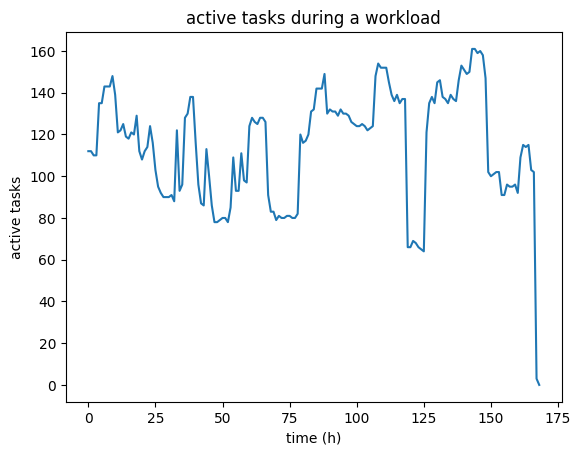

In [75]:
plt.plot(df_service.tasks_active)

plt.title("active tasks during a workload")
plt.xlabel("time (h)")
plt.ylabel("active tasks")
plt.show()

### Hosts

We can also look at the performance of the hosts. 

Lets plot the utilization of the hosts over time.

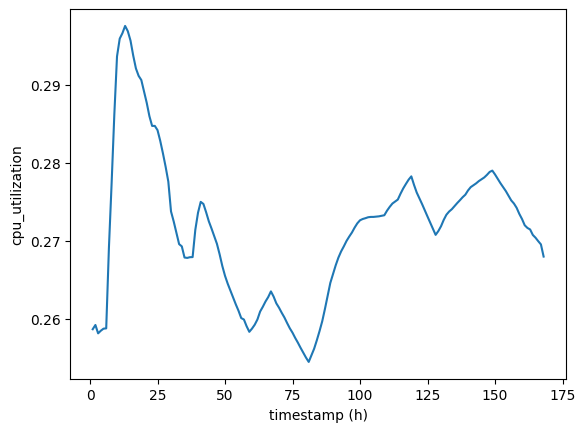

In [76]:
def plotHost(df_host, column, aggregation_method, window_size=1000):
    if aggregation_method not in ["mean", "sum"]:
        raise ValueError(f"incorrect aggregation method provided: {aggregation_method}, please pick on of [mean, sum]")

    df_agg = df_host.groupby("timestamp")[[column]].agg(aggregation_method)

    plt.plot(df_agg.index/1000/60/60, df_agg.rolling(window_size, min_periods=1).mean())
    plt.xlabel("timestamp (h)")
    plt.ylabel(column)


plotHost(df_host, "cpu_utilization", "mean")

### Sustainability

We can also plot sustainability related metrics.

Lets plot the energy usage over time

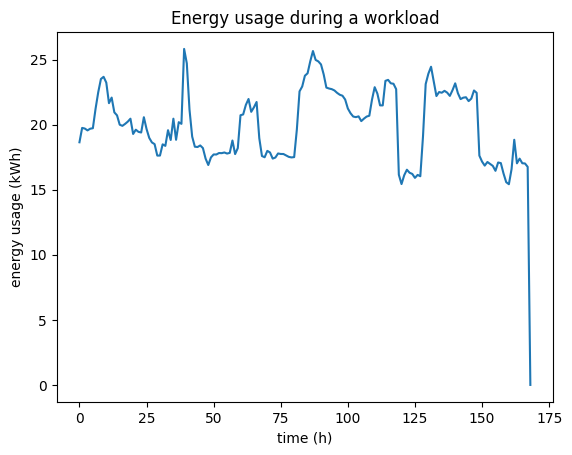

In [77]:
plt.plot(df_powerSource.energy_usage / 3_600_000)

plt.title("Energy usage during a workload")
plt.xlabel("time (h)")
plt.ylabel("energy usage (kWh)")
plt.show()

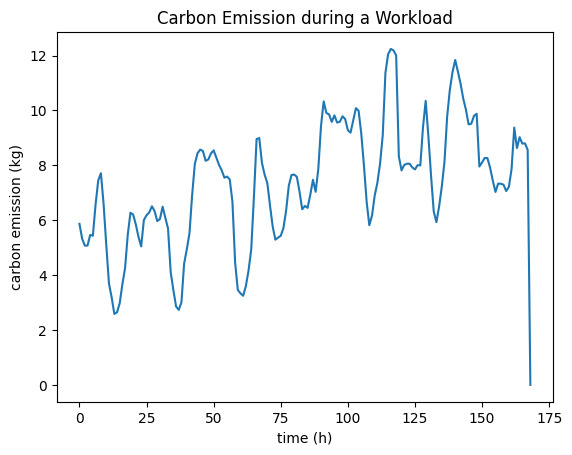

In [78]:
plt.plot(df_powerSource.carbon_emission / 1000)

plt.title("Carbon Emission during a Workload")
plt.xlabel("time (h)")
plt.ylabel("carbon emission (kg)")
plt.show()